# Vireo and Souporcell donor match

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import vireoSNP
import os
import glob
import subprocess
import tempfile

print("vireoSNP version: %s" % vireoSNP.__version__)

vireoSNP version: 0.5.8


In [44]:


def Vireo_SNP_Heatmap(VCF, WD, vireo_vcf_name, cmap=None, reverse_cmap=False, 
                       border_color="black", row_title=None, col_title=None):
    """
    Generate a heatmap comparing SNPs between a reference VCF and a Vireo SNP VCF.

    Parameters:
    VCF (str): Path to the reference VCF file.
    WD (str): Working directory containing the Vireo output.
    vireo_vcf_name (str): Name of the Vireo-generated VCF file (e.g., "cluster_genotypes.vcf").
    cmap (str or None): Colormap for the heatmap. If None, the default vireoSNP color is used.
    reverse_cmap (bool): Whether to reverse the colormap.
    border_color (str): Color of the heatmap cell borders and legend bar border.
    row_title (str or None): Custom title for row labels. Defaults to extracted name from VCF.
    col_title (str or None): Custom title for column labels. Defaults to extracted name from vireo VCF.

    Returns:
    None
    """
    penultimate_folder = os.path.basename(os.path.dirname(os.path.dirname(WD)))
    vireo_vcf = os.path.join(WD, vireo_vcf_name)

    # Extract default names from filenames if no custom titles are provided
    default_row_title = os.path.splitext(os.path.basename(vireo_vcf))[0]
    default_col_title = os.path.splitext(os.path.basename(VCF))[0]
    
    row_title = row_title if row_title else default_row_title
    col_title = col_title if col_title else default_col_title

    # Run SNP matching
    res = vireoSNP.vcf.match_VCF_samples(vireo_vcf, VCF, GT_tag1="GT", GT_tag2="GT")

    matched_indices = [i for i, diff in enumerate(res["matched_GPb_diff"]) if diff is not None]
    matched_donors1 = [res["matched_donors1"][i] for i in matched_indices]
    matched_donors2 = [res["matched_donors2"][i] for i in matched_indices]
    matched_GPb_diff = np.array([res["matched_GPb_diff"][i] for i in matched_indices])

    if matched_GPb_diff.size == 0:
        print(f"⚠️ No valid SNP matches found for {penultimate_folder}. No heatmap will be generated.")
        return

    fig, ax = plt.subplots(figsize=(6, 4))

    # Reverse colormap if needed
    if cmap is not None and reverse_cmap:
        cmap += "_r"

    if cmap is None:
        # Use default vireoSNP color scheme
        vireoSNP.plot.heat_matrix(matched_GPb_diff, matched_donors1, matched_donors2)
    else:
        # Use Seaborn heatmap with custom colormap and border color
        heatmap = sns.heatmap(matched_GPb_diff, cmap=cmap, ax=ax, xticklabels=matched_donors2, 
                              yticklabels=matched_donors1, linewidths=0.5, linecolor=border_color,
                              cbar=True)

        # Modify the color bar border
        cbar = heatmap.collections[0].colorbar
        cbar.outline.set_edgecolor(border_color)

        plt.xlabel(col_title)
        plt.ylabel(row_title)
        plt.title(f"{penultimate_folder} - Geno Prob Delta: {res['matched_n_var']} SNPs")

    plt.tight_layout()
    plt.savefig(os.path.join(WD, "Geno_Prob_Delta.pdf"))
    plt.show()

## FN_S1256

Shape for Geno Prob in VCF1: (660895, 4, 3)
Shape for Geno Prob in VCF2: (660895, 4, 3)
n_variants in VCF1, VCF2 and matched: 660895, 81704, 23159
aligned donors:
['donor0' 'donor1' 'donor2']
['S1-PCW7' 'S6-PCW12' 'S2-PCW8']


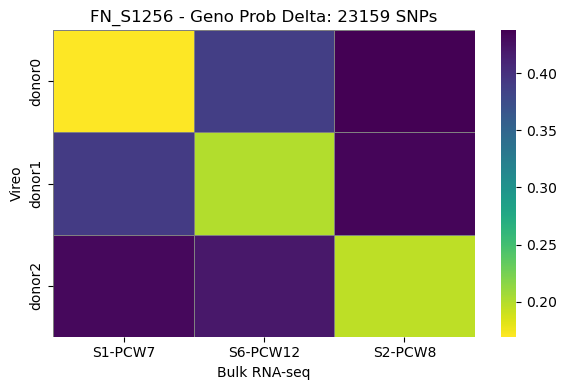

Shape for Geno Prob in VCF1: (1022674, 4, 3)
Shape for Geno Prob in VCF2: (1022674, 4, 3)
n_variants in VCF1, VCF2 and matched: 1022674, 81704, 33012
aligned donors:
['donor1' 'donor3' 'donor2']
['S2-PCW8' 'S6-PCW12' 'S1-PCW7']


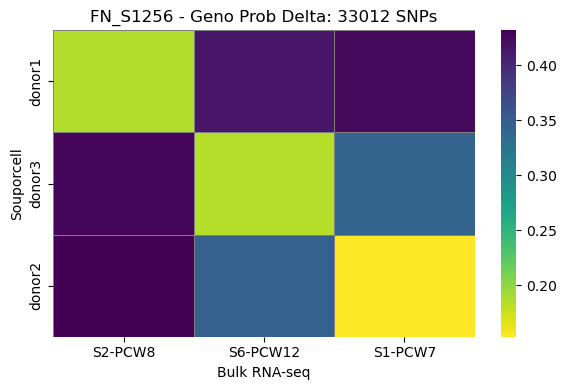

Shape for Geno Prob in VCF1: (751514, 4, 3)
Shape for Geno Prob in VCF2: (751514, 4, 3)
n_variants in VCF1, VCF2 and matched: 751514, 81704, 28280
aligned donors:
['donor0' 'donor1' 'donor2' 'donor3']
['S8-PCW12' 'S3-PCW10' 'S7-PCW12' 'S4-PCW10.5']


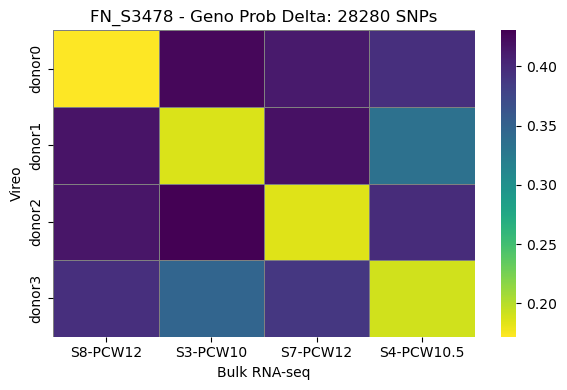

Shape for Geno Prob in VCF1: (1095086, 4, 3)
Shape for Geno Prob in VCF2: (1095086, 4, 3)
n_variants in VCF1, VCF2 and matched: 1095086, 81704, 38075
aligned donors:
['donor2' 'donor0' 'donor1' 'donor3']
['S3-PCW10' 'S7-PCW12' 'S8-PCW12' 'S4-PCW10.5']


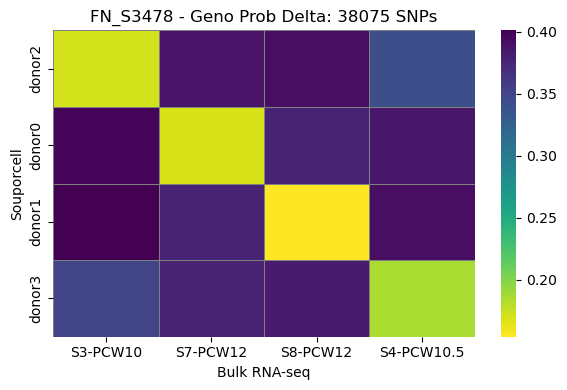

In [52]:
# Bulk RNA-seq
VCF_path = "/Users/yvon.mbouamboua/Documents/projects/singlecell/fetal_nose/data/processed/SNV/snv-bulk/"

# FN_S1256
VCF = f"{VCF_path}renamed_S1_S2_S6.vcf.gz"
WD = "/Users/yvon.mbouamboua/Documents/projects/singlecell/fetal_nose/results/02_preprocessing/WS_demuxafy/FN_S1256/Vireo_OUTDIR/"
Vireo_SNP_Heatmap(VCF, WD, vireo_vcf_name = 'GT_donors.vireo.vcf.gz', cmap="viridis", reverse_cmap=True, border_color="gray", col_title="Bulk RNA-seq", row_title="Vireo") # vireo

WD = "/Users/yvon.mbouamboua/Documents/projects/singlecell/fetal_nose/results/02_preprocessing/WS_demuxafy/FN_S1256/Souporcell_OUTDIR/"
Vireo_SNP_Heatmap(VCF, WD, vireo_vcf_name = 'renamed_cluster_genotype.vcf', cmap="viridis", reverse_cmap=True, border_color="gray", col_title="Bulk RNA-seq", row_title="Souporcell") # souporcell


# FN_S3478
VCF = f"{VCF_path}renamed_joint_common.vcf.gz"
WD = "/Users/yvon.mbouamboua/Documents/projects/singlecell/fetal_nose/results/02_preprocessing/WS_demuxafy/FN_S3478/Vireo_OUTDIR/"
Vireo_SNP_Heatmap(VCF, WD, vireo_vcf_name = 'GT_donors.vireo.vcf.gz', cmap="viridis", reverse_cmap=True, border_color="gray",col_title="Bulk RNA-seq", row_title="Vireo") # vireo

WD = "/Users/yvon.mbouamboua/Documents/projects/singlecell/fetal_nose/results/02_preprocessing/WS_demuxafy/FN_S3478/Souporcell_OUTDIR/"
Vireo_SNP_Heatmap(VCF, WD, vireo_vcf_name = 'renamed_cluster_genotype.vcf', cmap="viridis", reverse_cmap=True, border_color="gray", col_title="Bulk RNA-seq", row_title="Souporcell") # souporcell
